# Image Operations
___

Almost all the operations in this section is mainly related to Numpy rather than OpenCV. A good knowledge
of Numpy is required to write better optimized code with OpenCV.

## Accessing and Modifying pixel values
Let's load a color image first:

In [1]:
import cv2
import numpy as np
from matplotlib.pyplot import *
%matplotlib inline

img = cv2.imread('images/googlelogo.jpg')

You can access a pixel value by its row and column coordinates.
For BGR image, it returns an array of Blue, Green, Red values.
For grayscale image, just corresponding intensity is returned.


In [2]:
px = img[150,300]
print px

[ 57  65 236]


In [3]:
# accessing only blue pixel
blue = img[100,100,0]
print blue

255


You can modify the pixel values the same way.


In [4]:
img[100,100] = [255,255,255]
print img[100,100]

[255 255 255]


## Better pixel accessing and editing method :

In [5]:
# accessing RED value
img.item(10,10,2)

255

In [6]:
# modifying RED value
img.itemset((10,10,2),100)
img.item(10,10,2)

100

## Accessing Image Properties
Image properties include number of rows, columns and channels, type of image data, number of pixels etc.
Shape of image is accessed by img.shape. It returns a tuple of number of rows, columns and channels (if image is
color):

In [7]:
print img.shape

(500L, 500L, 3L)


If image is grayscale, tuple returned contains only number of rows and columns. So it is a good method to
check if loaded image is grayscale or color image.

Total number of pixels is accessed by img.size:

In [8]:
print img.size

750000


Image datatype is obtained by img.dtype:


In [9]:
print img.dtype

uint8


## Image ROI
Sometimes, you will have to play with certain region of images. For eye detection in images, first perform face
detection over the image until the face is found, then search within the face region for eyes. This approach improves
accuracy (because eyes are always on faces :D ) and performance (because we search for a small area).

ROI is again obtained using Numpy indexing.

In [10]:
region = img[250:350, 400:220]
img[100:200, 250:70] = region

## Splitting and Merging Image Channels
The B,G,R channels of an image can be split into their individual planes when needed. Then, the individual channels
can be merged back together to form a BGR image again. This can be performed by:


In [11]:
b,g,r = cv2.split(img)
img = cv2.merge((b,g,r))
#Or
b = img[:,:,0]


Suppose, you want to make all the red pixels to zero, you need not split like this and put it equal to zero. You can
simply use Numpy indexing which is faster.

In [12]:
img[:,:,2] = 0

___
# Arithmetic Operations on Images

### Image Addition

You can add two images by OpenCV function, cv2.add() or simply by numpy operation, res = img1 + img2.
Both images should be of same depth and type, or second image can just be a scalar value.

Here are the two images we would be 'adding':

<img  style="float:left;padding-left:40px;padding-right:40px;" src="https://raw.githubusercontent.com/Applied-Programming/Computer-Vision/master/images/m1left.jpg"/> 

<img  style="float:left;padding-left:40px;padding-right:40px;" src="https://raw.githubusercontent.com/Applied-Programming/Computer-Vision/master/images/m2right.jpg"/> 

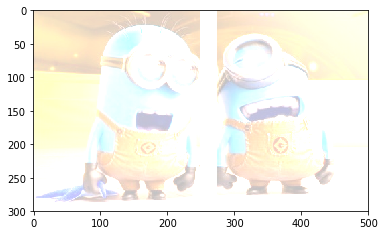

In [24]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# 500 x 300 sized images
img1 = cv2.imread('images/minionleft.jpg')
img2 = cv2.imread('images/minionright.jpg')

add = cv2.add(img1,img2)  # adds pixel values of first image to those of the second
#cv2.imshow('add',add)
#cv2.waitKey(0)
#cv2.destroyAllWindows()
plt.imshow(add)
plt.show()

### Image Blending
This is also image addition, but different weights are given to images so that it gives a feeling of blending or transparency.

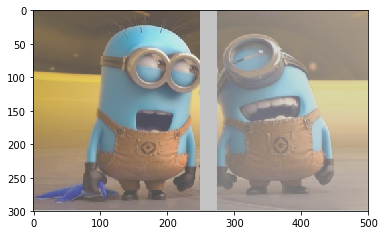

In [25]:
weighted = cv2.addWeighted(img1, 0.6, img2, 0.4, 0)  # affects opaqueness
#cv2.imshow('weighted',weighted)
#cv2.waitKey(0)
#cv2.destroyAllWindows()
plt.imshow(weighted)

___